
# Prueba de Hipótesis con Distribución Laplaciana

Este notebook analiza un problema de prueba de hipótesis binaria donde la variable observable \( Y \) sigue una distribución Laplaciana desplazada dependiendo de la hipótesis.

## Definición del problema

Estamos analizando un problema de detección binaria en el contexto de procesamiento de señales o teoría de la decisión.
Se nos da una variable observable 𝑌, cuya distribución depende de una hipótesis binaria $𝐻∈{0,1}$, con igual probabilidad a priori:

Bajo las hipótesis:

- \( H = 0 \): \( Y = a + Z \)
- \( H = 1 \): \( Y = -a + Z \)


$$f(z) = \frac{1}{2} e^{-\left|z - u\right|}$$

Como las hipótesis son equiprobables y conocemos las densidades condicionales, la regla de decisión óptima en el sentido de máxima verosimilitud es:

Decidir H=0 si $f_{Y∣H}(y∣0)$ $>$ $f_{Y∣H}(y∣1)$ (y viceversa)

Para este caso simétrico, el umbral óptimo se da cuando ambas densidades se igualan, es decir, cuando:

$f_{Y∣H}(y∣0)$ $=$ $f_{Y∣H}(y∣1)$

Resolviendo eso se obtiene que el nivel de decisión óptimo es $𝑦=0$, lo que significa:

- Si $𝑦>0$ decidimos 𝐻=0
- Si $𝑦<0$ decidimos 𝐻=1

El valor $𝑦=0$ es el punto donde ambas densidades cruzan.

Se desea:

1. Graficar las funciones $f_{Y|H}(y|0) \ y \ f_{Y|H}(y|1) $
2. Determinar la regla de decisión óptima cualitativa y cuantitativamente
3. Calcular la probabilidad de error $P_e$

## Importar librerías


In [9]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


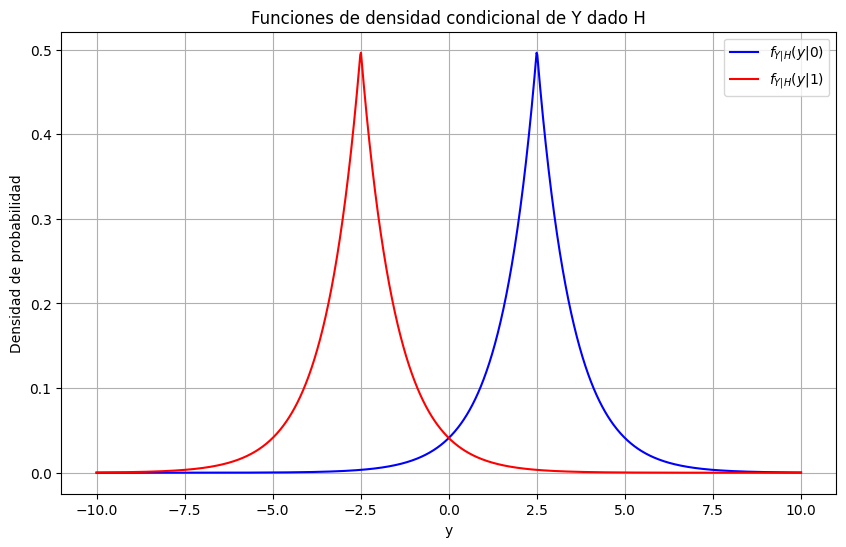

In [7]:

# Parámetro
a = 2.5
y = np.linspace(-10, 10, 1000)

# Funciones de densidad condicional
f_y_given_0 = 0.5 * np.exp(-np.abs(y - a))
f_y_given_1 = 0.5 * np.exp(-np.abs(y + a))

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(y, f_y_given_0, label=r'$f_{Y|H}(y|0)$', color='blue')
plt.plot(y, f_y_given_1, label=r'$f_{Y|H}(y|1)$', color='red')
plt.title('Funciones de densidad condicional de Y dado H')
plt.xlabel('y')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()


In [8]:

# Densidades para integración
f_y0 = lambda y: 0.5 * np.exp(-np.abs(y - a))
f_y1 = lambda y: 0.5 * np.exp(-np.abs(y + a))

# Integrales para probabilidad de error
Pe_0 = quad(f_y0, -np.inf, 0)[0]
Pe_1 = quad(f_y1, 0, np.inf)[0]
P_e = 0.5 * (Pe_0 + Pe_1)

print(f"Probabilidad de error P_e = {P_e:.4f}")


Probabilidad de error P_e = 0.0410
